In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import math


**Analyze the raw dataset**

In [5]:
data = Dataset("K:/private/lorenzogamba,tomscag/CMIP6_2.6_projections_2022_2100_regridded_5deg.nc", 'r')

# print variables 
for var in data.variables:
    print(var)

lat = data.variables['lat']
lon = data.variables['lon']
time = data.variables['time']
dayofyear = data.variables['dayofyear']
tas = data.variables['tas']
height = data.variables['height']

print(lat)
print(lon)
print(time)
print(height) 
print(tas)
print(dayofyear)

height
lat
lon
tas
time
dayofyear
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (37,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (72,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: nan
    units: days since 2015-01-01
    calendar: proleptic_gregorian
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 height()
    _FillValue: nan
unlimited dimensions: 
current shape = ()
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: nan
    coordinates: height
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854, 37, 72)
filling on
<class 'netCDF4._netCDF4.Variable'>
int32 dayofyear(time)
unlimited dimensions: time
current

**Create the anomalies dataset**

In [8]:
src_file = "K:/private/lorenzogamba,tomscag/CMIP6_2.6_projections_2022_2100_regridded_5deg.nc"
dest_file = "C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/anomalies_t2m_2022_2100_5grid_lowemission.nc"  # Modifica con il percorso desiderato

src_dataset = nc.Dataset(src_file, 'r')
dest_dataset = nc.Dataset(dest_file, 'r+')

# Copy dimensions
for dim_name, dim in src_dataset.dimensions.items():
    dest_dataset.createDimension(dim_name, (len(dim) if not dim.isunlimited() else None))

# Copy structur of variabiables
for var_name, var in src_dataset.variables.items():
    new_var = dest_dataset.createVariable(var_name, var.datatype, var.dimensions)
    # Copy attributes
    new_var.setncatts({attr: var.getncattr(attr) for attr in var.ncattrs()})
src_dataset.close()
dest_dataset.close()

**Anomalies dataset**

In [8]:
data = Dataset("C:\\Users\\David\\OneDrive\\Desktop\\CLIMATE_NETWORK\\data\\filtered_t2m_1970_2022_5grid.nc", 'r')

# print variables 
for var in data.variables:
    print(var)

lat = data.variables['lat']
lon = data.variables['lon']
t2m = data.variables['t2m']

print(lat)
print(lon)
print(t2m)

lat
lon
t2m
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
unlimited dimensions: 
current shape = (37,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 t2m(time, lat, lon)
unlimited dimensions: 
current shape = (19358, 37, 72)
filling on, default _FillValue of 9.969209968386869e+36 used


time
lat
lon
t2m
80.0 80.0
0.0 0.0


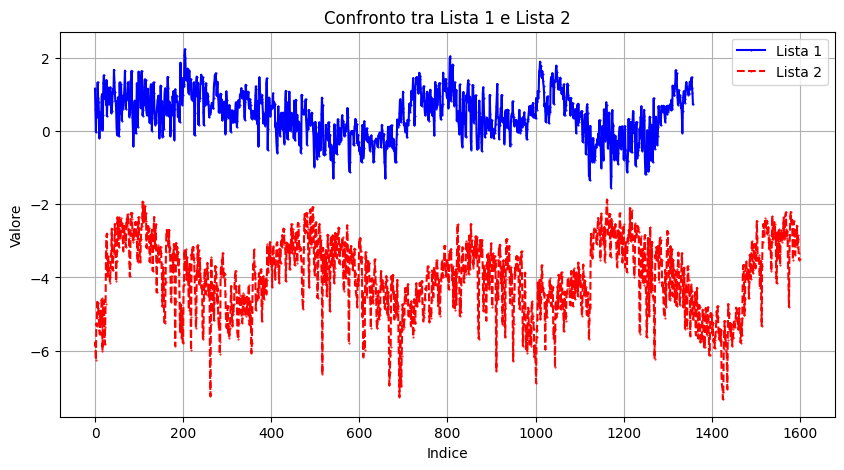

[-180. -175. -170. -165. -160. -155. -150. -145. -140. -135. -130. -125.
 -120. -115. -110. -105. -100.  -95.  -90.  -85.  -80.  -75.  -70.  -65.
  -60.  -55.  -50.  -45.  -40.  -35.  -30.  -25.  -20.  -15.  -10.   -5.
    0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
   60.   65.   70.   75.   80.   85.   90.   95.  100.  105.  110.  115.
  120.  125.  130.  135.  140.  145.  150.  155.  160.  165.  170.  175.]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355.]
-20.0 -20.0
0.0 0.0


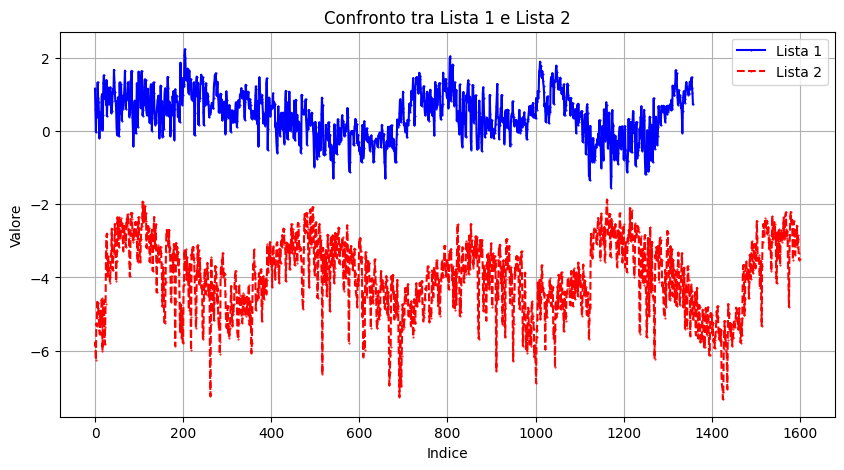

-20.0 -20.0
5.0 5.0


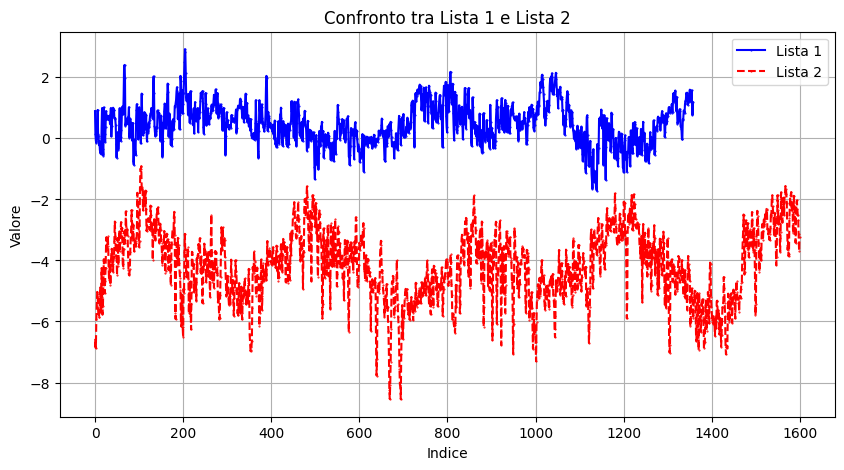

-20.0 -20.0
10.0 10.0


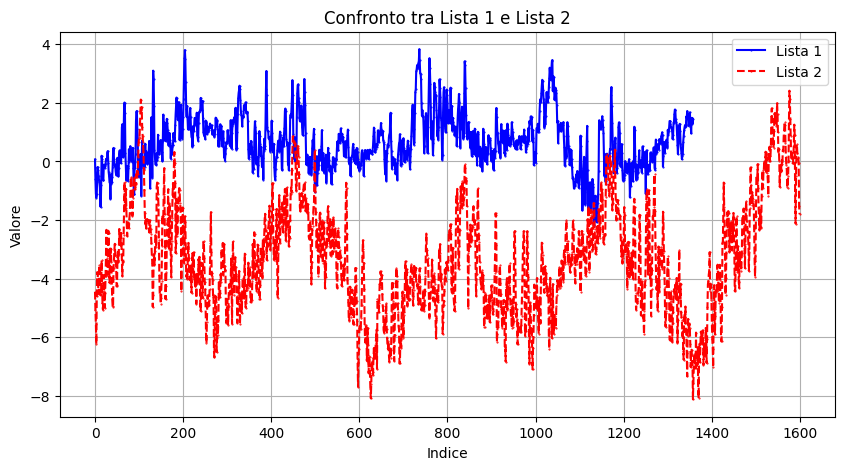

-20.0 -20.0
15.0 15.0


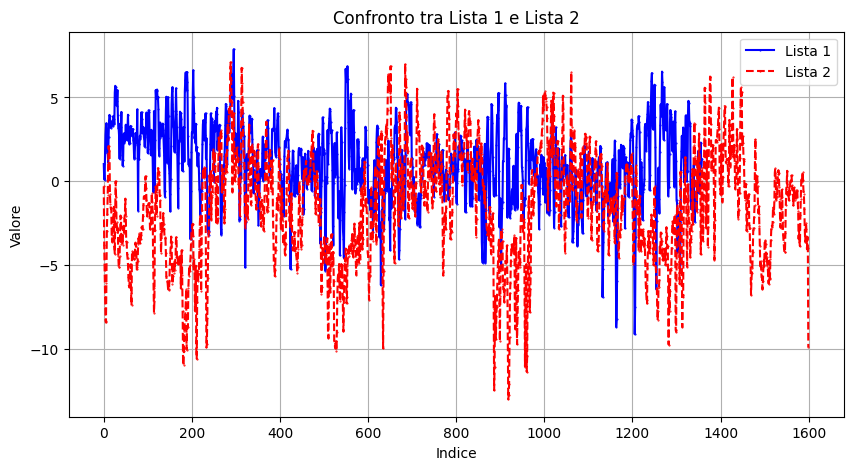

-20.0 -20.0
20.0 20.0


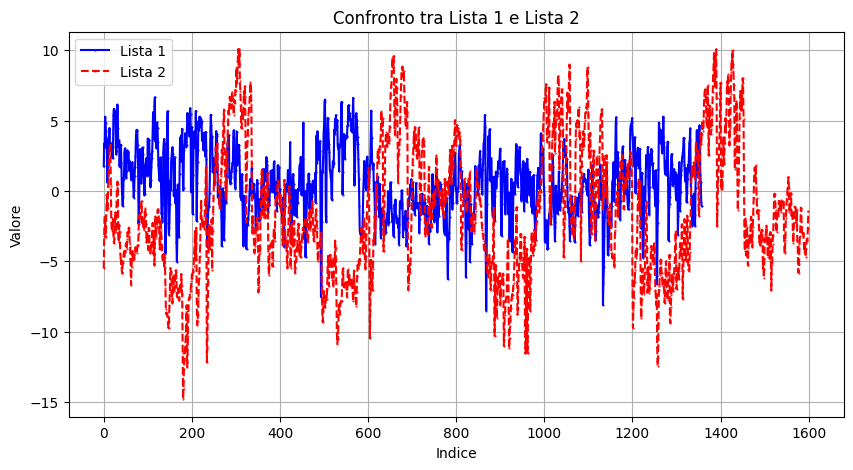

-20.0 -20.0
25.0 25.0


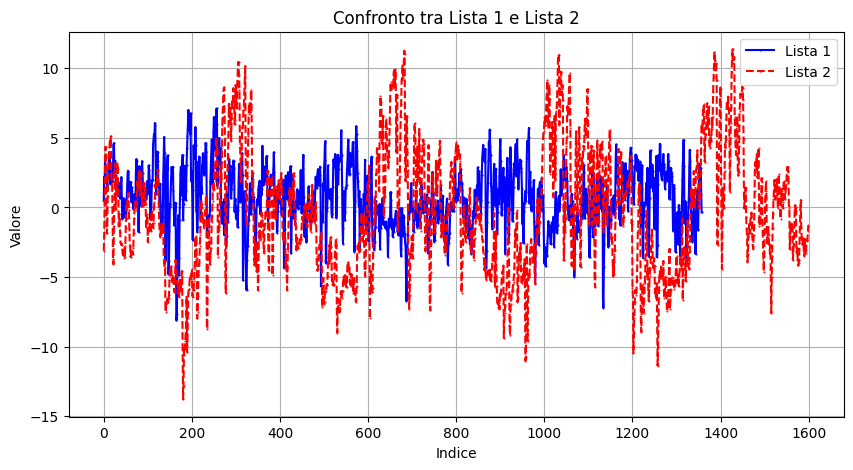

-20.0 -20.0
30.0 30.0


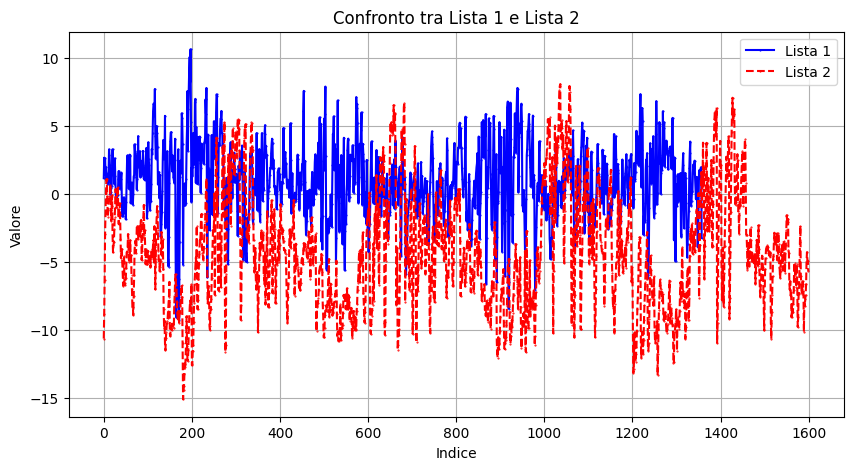

-20.0 -20.0
35.0 35.0


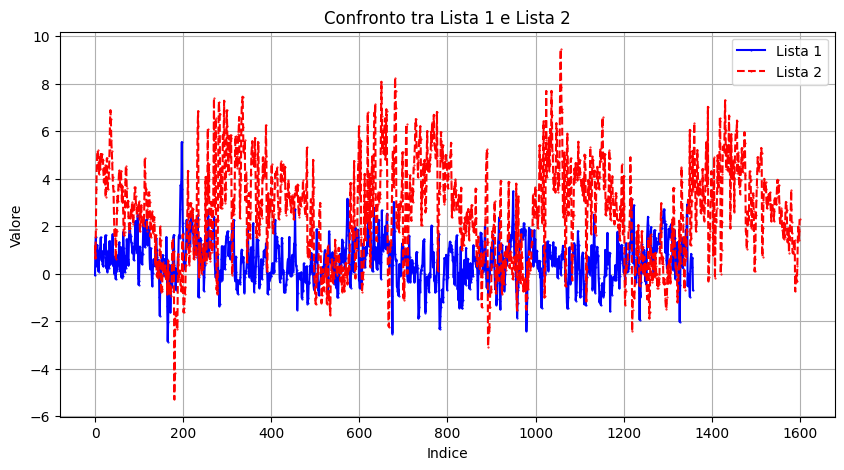

-20.0 -20.0
40.0 40.0


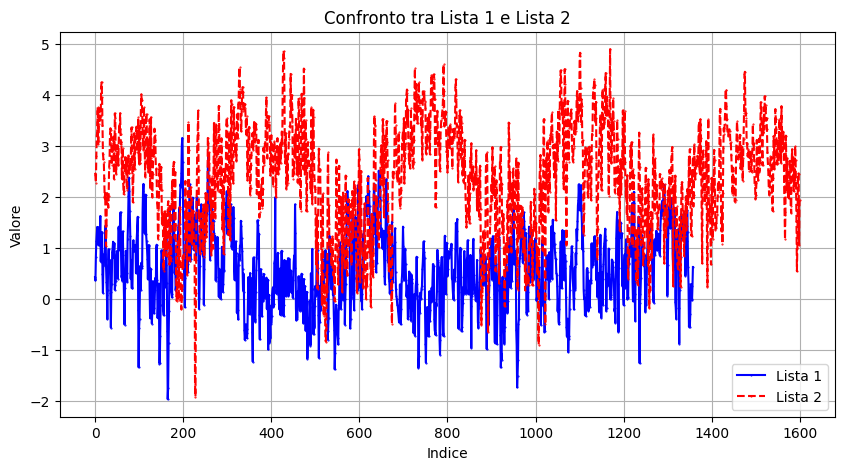

-20.0 -20.0
45.0 45.0


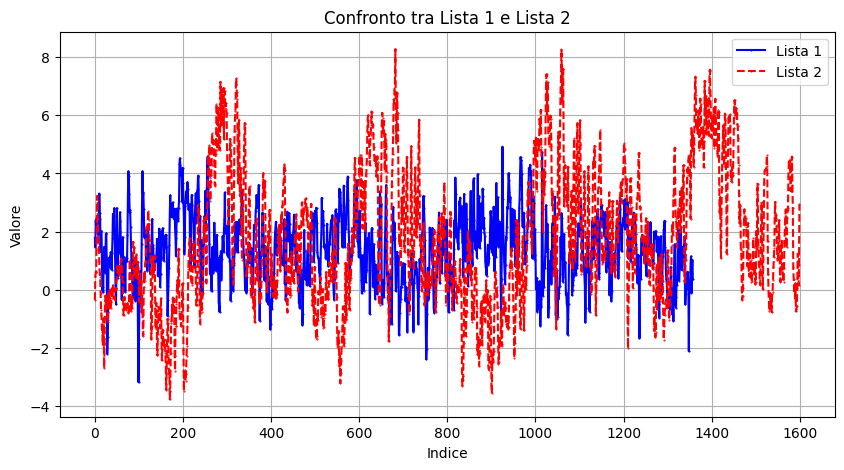

In [85]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt

def plot_two_lists(lista1, lista2):
    """
    Funzione che riceve due liste di valori numerici e crea un grafico a linee per confrontare questi valori.

    Args:
    lista1 (list): Prima lista di valori numerici da plottare.
    lista2 (list): Seconda lista di valori numerici da plottare.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))  # Imposta la dimensione della figura
    plt.plot(lista1, marker='o', linestyle='-', markersize =.5, color='b', label='Lista 1')  # Grafico per la prima lista
    plt.plot(lista2, marker='o', linestyle='--', markersize =.5, color='r', label='Lista 2')  # Grafico per la seconda lista
    plt.title("Confronto tra Lista 1 e Lista 2")  # Aggiunge un titolo al grafico
    plt.xlabel("Indice")  # Etichetta per l'asse x
    plt.ylabel("Valore")  # Etichetta per l'asse y
    plt.grid(True)  # Aggiunge una griglia per facilitare la lettura
    plt.legend()  # Mostra la legenda per distinguere le due liste
    plt.show()  # Mostra il grafico
# DATA
#data1 = Dataset("K:/private/lorenzogamba,tomscag/CMIP6_2.6_projections_2022_2100_regridded_5deg.nc", 'r')
data1 =  Dataset("C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/filtered_t2m_2022_2100_5grid.nc", 'r')
for var in data1.variables:
    print(var)
lat = data1.variables['lat']          #len(lat)=91
lon = data1.variables['lon']          #len(lon)=180
temp = data1.variables['t2m']         #len(temp)=365



# DATA Daily Mean
#dataDM = Dataset('D:/HD climatenetwork/PAPER/t2m_1970_2022_5grid.nc', 'r')
dataDM =  Dataset("C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/filtered_t2m_1970_2022_5grid.nc", 'r')
latDM = dataDM.variables['lat']          #len(lat)=91
lonDM = dataDM.variables['lon']          #len(lon)=180
tempDM = dataDM.variables['t2m']         #len(temp)=365



print(latDM[34], lat[34])
print(lonDM[36], lon[0])

plot_two_lists(tempDM[18000:, 14, 36], temp[:1600, 14, 0])
print(lonDM[:])
print(lon[:])
for i in range(10):
    london= 0+i
    londtu = 36+i
    print(latDM[14], lat[14])
    print(lonDM[londtu], lon[london])
    plot_two_lists(tempDM[18000:, 14, londtu], temp[:1600, 14, london])

In [11]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt

# DATA
#data1 = Dataset("K:/private/lorenzogamba,tomscag/CMIP6_2.6_projections_2022_2100_regridded_5deg.nc", 'r')
data1 =  Dataset("C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/anomalies_t2m_2022_2100_5grid_lowemission.nc", 'r')

for var in data1.variables:
    print(var)
lat = data1.variables['lat']          #len(lat)=91
lon = data1.variables['lon']          #len(lon)=180
temp = data1.variables['tas']         #len(temp)=365

print(lat)
print(lon)
print(temp) 

# DATA Daily Mean
dataDM = Dataset('D:/HD climatenetwork/PAPER/t2m_1970_2022_5grid.nc', 'r')


latDM = dataDM.variables['lat']          #len(lat)=91
lonDM = dataDM.variables['lon']          #len(lon)=180
tempDM = dataDM.variables['t2m']         #len(temp)=365



print(lat)
print(lon)
print(temp)

nyear = 20                  #NUMERO DI ANNI PER LA MEDIA
nbiyear = (nyear+1) // 4 
nnormyear = nyear - nbiyear
ndays = nbiyear * 366 + nnormyear *365

dailymean1 = [0]*366
dailymean2 = [0]*366
timerange = list(range(0, 28854))
Nday = list(range(0, 365))
Nbiday = list(range(0, 366))
Nyear = list(range(0, nyear))
Totyear = list(range(0, 79))
biyear = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74 ]
normalyear = [y for y in Totyear if y not in biyear]

Datifiltrati = nc.Dataset("C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/anomalies_t2m_2022_2100_5grid_lowemission.nc" , 'r+', format='NETCDF4')

'''# CREAZIONE NUOVO DATASET NETCDF4
for dimname, dim in data.dimensions.items():
    Datifiltrati.createDimension(dimname, len(dim))

lat_nuova = Datifiltrati.createVariable('lat', lat.dtype, lat.dimensions)
lon_nuova = Datifiltrati.createVariable('lon', lon.dtype, lon.dimensions)
tas_nuova = Datifiltrati.createVariable('t2m', data.variables['tas'].dtype, data.variables['tas'].dimensions)
lat_nuova[:] = lat[:]
lon_nuova[:] = lon[:]

print(lat_nuova)'''


lat2 = Datifiltrati.variables['lat'][:]          
lon2 = Datifiltrati.variables['lon'][:]
temp_nuova = Datifiltrati.variables['tas']

print(temp_nuova)



lat_range = list(range(0,len(lat2)))
lon_range = list(range(0,len(lon2)))





for y in lat_range:
    for x in lon_range:
        print(y, '        ', x )
        timeseries = temp[:,y,x]
        timeseriesDM = tempDM[:ndays,y,x]
        n=0
        b=0
        for yr in Nyear:                 # CALCOLO MEDIA PRIMI 20 ANNI    
            if yr in normalyear:
                for d in Nday:
                    #print(d)
                    dailymean1[d] += timeseriesDM[365*n+366*b+d]/nyear
                n += 1
            if yr in biyear:
                for d in Nbiday:
                    if d < 59:
                        dailymean1[d] += timeseriesDM[365*n+366*b+d]/nyear
                    if d == 59:
                        dailymean1[365] += timeseriesDM[365*n+366*b+59]/nbiyear             
                    if d > 59:
                        dailymean1[d-1] += timeseriesDM[365*n+366*b+d]/nyear
                b+=1   

        n=0
        b=0
        #                               DATA FILTERED
        for yr in Totyear:
            if yr in normalyear:
                for d in Nday:
                    temp_nuova[365*n+366*b+d,y,x] = timeseries[365*n+366*b+d] - dailymean1[d]
                n += 1
 
            if yr in biyear:
                for d in Nbiday:
                    if d < 59:
                        temp_nuova[365*n+366*b+d,y,x]= timeseries[365*n+366*b+d] - dailymean1[d]
                    if d == 59:
                        temp_nuova[365*n+366*b+d,y,x]= timeseries[365*n+366*b+d] - dailymean1[365]               
                    if d > 59:
                        temp_nuova[365*n+366*b+d,y,x]= timeseries[365*n+366*b+d] - dailymean1[d-1]
                b+=1 
        
        '''  #GRAFICO DI CONTROLLO
        
        plt.scatter(timerange, timeseries, label='timeseries1')
        plt.scatter(list(range(0,366)), dailymean1, label='dailmean')
        plt.scatter(timerange,  temp_nuova[:,y,x], label='tempnuova')
        plt.xlabel('Day')
        plt.ylabel('Temp')
        plt.legend()
        plt.show()'''


        dailymean1 = [0]*366




print(lat2[:])
print(lon2)
print(temp_nuova[:])

# SALVATAGGIO MODIFICHE
dataDM.close()
data1.close()
Datifiltrati.close() 

height
lat
lon
tas
time
dayofyear
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (37,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (72,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: nan
    coordinates: height
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854, 37, 72)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (37,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (72,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: nan
    coordinates: height
    cell_methods: time: mean
unlimite

In [13]:
import netCDF4 as nc

# Define the path to the NetCDF file
file_path ='C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/anomalies_t2m_2022_2100_5grid_lowemission.nc'

try:
    # Open the NetCDF file
    dataset = nc.Dataset(file_path, 'r')

    # Print information about each variable
    print("Variables in the dataset:")
    for var_name in dataset.variables:
        print(var_name, dataset.variables[var_name])

    # Close the dataset after use
    dataset.close()
except OSError as e:
    print(f"Failed to open or process the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Variables in the dataset:
height <class 'netCDF4._netCDF4.Variable'>
float64 height()
    _FillValue: nan
unlimited dimensions: 
current shape = ()
filling on
lat <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (37,)
filling on
lon <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (72,)
filling on
tas <class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: nan
    coordinates: height
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854, 37, 72)
filling on
time <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: nan
    units: days since 2015-01-01
    calendar: proleptic_gregorian
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854,)
filling on
dayofyear <class 'netCDF4._netCDF4.Variable'>
int32 dayofyear(time)
unlimite

In [16]:
# COPIARE UN DATASET

# DATA
data = nc.Dataset('C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/anomalies_t2m_2022_2100_5grid_lowemission.nc', 'r')
lat = data.variables['lat']          #len(lat)=91
lon = data.variables['lon']          #len(lon)=180
temp = data.variables['tas']         #len(temp)=365

print(lat)
print(lon)
print(temp)

# Crea il nuovo dataset NetCDF4
Datifiltrati = nc.Dataset('C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/surr_IAAFT_t2m_2022_2100_5grid_lowemission.nc', 'w', format='NETCDF4')

# Definisci le dimensioni
num_dim = Datifiltrati.createDimension('num', 51)
time_dim = Datifiltrati.createDimension('time', 28854)  # Assumendo che 'time' sia la dimensione temporale
lat_nuova = Datifiltrati.createDimension('lat', 37)
lon_nuova = Datifiltrati.createDimension('lon', 72)

# Crea le variabili
time_var = Datifiltrati.createVariable('time', np.float32, ('time',))
lat_var = Datifiltrati.createVariable('lat', np.float32, ('lat',))
lon_var = Datifiltrati.createVariable('lon', np.float32, ('lon',))
num_var = Datifiltrati.createVariable('num', np.int32, ('num',))
t2m_var = Datifiltrati.createVariable('sh_t2m', np.float32, ('num', 'time', 'lat', 'lon'))
lat_var[:] = lat[:]
lon_var[:] = lon[:]

print(lat_var)
print(lon_var)
print(Datifiltrati.variables.keys())
print(num_var)
print(t2m_var)

# Chiudi il dataset
Datifiltrati.close()
data.close()


<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    units: degrees_north
unlimited dimensions: 
current shape = (37,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    units: degrees_east
unlimited dimensions: 
current shape = (72,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: nan
    coordinates: height
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854, 37, 72)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
unlimited dimensions: 
current shape = (37,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used
dict_keys(['time', 'lat', 'lon', 'num', 'sh_t2m'])
<class 'netCDF4._netCDF4.Variable'>
int32 num(num)
unlimited dimensions: 
current shape = (51,)
filling on, default _

Surrogates Fill

In [18]:
import iaaft

# DATA INPUT
data = Dataset('C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/anomalies_t2m_2022_2100_5grid_lowemission.nc', 'r')
#data = Dataset('./data/shuffled_t2m_1970_2022_4grid.nc', 'r')
lat  = data.variables['lat']        
lon  = data.variables['lon']            
temp = data.variables['tas']
print(temp)


# DATA OUTPUT
Datifiltrati = Dataset('C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/surr_IAAFT_t2m_2022_2100_5grid_lowemission.nc', 'r+')
lat_var = Datifiltrati.variables['lat']
lon_var = Datifiltrati.variables['lon']
num_var = Datifiltrati.variables['num']
sh_t2m = Datifiltrati.variables['sh_t2m']
print(lat_var)
print(lon_var)
print(num_var,'\n\n\n')
print(sh_t2m)

# NODES
lon_range = range(0, len(lon))
lat_range = range(0, len(lat))
nodes = tuple((i,j) for i in lat_range for j in lon_range)

'''for indi,nod in enumerate(nodes):
    print(indi, '\t', nod    )'''

# PARAMETERS
num_surr = 50
years_analysed = 1      # years intervals
#tot_years = 2023-1970
tot_years = 2101-2022

periods = tot_years//years_analysed    
print(periods)

years_analysed = 1  # Ogni anno


start_year = 2022
end_year = 2100

# Calcola il numero totale di anni nel range
total_years = end_year - start_year + 1

# Inizializza la lista dei giorni di inizio
start_days = []

# Calcola il giorno di inizio per ogni anno tenendo conto degli anni bisestili
current_day = 0  # Partiamo dal giorno 0, cioè il 1 gennaio 2022
for year in range(start_year, end_year + 1):
    start_days.append(current_day)
    # Controlla se l'anno è bisestile
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        days_in_year = 366
    else:
        days_in_year = 365
    current_day += days_in_year

last_day_index = 28854
start_days.append(28854)

### RANDOMIZE Surrogates
'''
sh_t2m[0, :, :, :] = temp[:, :, :]

surrogate_matrix = np.empty((num_surr, temp.shape[0], len(lat_range), len(lon_range)))

# Randomizzazione vettorializzata per ciascun surrogato
for n in range(num_surr+1):
    print(n)
    for dec in range(periods):
        print(dec)
        start, end = start_days[dec], start_days[dec+1] if dec < periods - 1 else temp.shape[0]
        
        # Seleziona il blocco di dati per l'anno corrente e randomizzalo
        year_block = temp[start:end, :, :]  # Selezione dell'intero blocco per l'anno
        reshaped_block = year_block.reshape(year_block.shape[0], -1)  # Ristrutturazione per randomizzazione
        
        # Randomizzazione
        for idx in range(reshaped_block.shape[1]):
            np.random.shuffle(reshaped_block[:, idx])
        
        # Riassegnazione al surrogato corretto, mantenendo la struttura originale
        surrogate_matrix[n, start:end, :, :] = reshaped_block.reshape(year_block.shape)

# Assumi sh_t2m[0, :, :, :] già riempito con dati originali
sh_t2m[1:, :, :, :] = surrogate_matrix

scatter_plot(temp[:, 1, 1], sh_t2m[11, :, 1, 1])
'''

'''for i in lat_range:
    for j in lon_range:
        print(f'Surrogating node ({i},{j}):')
        sh_t2m[0, :, i, j] = temp[:, i, j]  # Assegna i dati originali al primo layer
        
        # Inizializza una matrice temporanea per tutti i surrogati di questo nodo
        # Dimensioni: [num_surr, lunghezza della serie temporale totale]
        surrogate_matrix = np.zeros((num_surr, len(temp[:, i, j])))

        # Cicla attraverso ogni periodo
        for dec in range(periods):
            start, end = start_days[dec], start_days[dec+1]
            serie_temporale = temp[start:end, i, j]

            # Genera tutti i surrogati per questo periodo e assegnali nella matrice temporanea
            for n in range(num_surr):
                serie_randomizzata = np.random.permutation(serie_temporale)
                surrogate_matrix[n, start:end] = serie_randomizzata

        # Assegna la matrice dei surrogati a sh_t2m per questo nodo
        for n in range(num_surr):
            sh_t2m[n+1, :, i, j] = surrogate_matrix[n, :]

        scatter_plot(sh_t2m[0, :, i, j], sh_t2m[1, :, i, j])
        scatter_plot(sh_t2m[0, :, i, j], sh_t2m[50, :, i, j])
'''
### IAAFT Surrogates
                

for i in lat_range:
    for j in lon_range:
        print(f'Surrogating node ({i},{j}) :')
        sh_t2m[0,:,i,j] = temp[:,i,j]
        # surrogates generatioom
        all_surrogates = [[] for _ in range(num_surr)]
        for dec in range(periods):
            sh_serieiaaft1 = iaaft.surrogates(x=temp[start_days[dec]:start_days[dec+1], i, j], ns=num_surr, verbose=False )
 
            for n in range(num_surr):
                for value in sh_serieiaaft1[n]:
                    all_surrogates[n].append(value)  # Assuming this is the surrogate data generated

        for n2 in range(num_surr):                                        
            sh_t2m[n2+1,:, i, j] = all_surrogates[n2]


# Chiudi il dataset
Datifiltrati.close()
data.close()

<class 'netCDF4._netCDF4.Variable'>
float32 tas(time, lat, lon)
    _FillValue: nan
    coordinates: height
    cell_methods: time: mean
unlimited dimensions: time
current shape = (28854, 37, 72)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
unlimited dimensions: 
current shape = (37,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
unlimited dimensions: 
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 num(num)
unlimited dimensions: 
current shape = (51,)
filling on, default _FillValue of -2147483647 used 



<class 'netCDF4._netCDF4.Variable'>
float32 sh_t2m(num, time, lat, lon)
unlimited dimensions: 
current shape = (51, 28854, 37, 72)
filling on, default _FillValue of 9.969209968386869e+36 used
79
Surrogating node (0,0) :
Surrogating node (0,1) :
Surrogating node (0,2) :
Surrogating node (0,3) :
Surrogating node (0,4) :
Surr

**Dask Client**

In [21]:
import dask.array as da
from dask.distributed import LocalCluster, Client
import dask

# Avviare il client Dask
cluster = LocalCluster(n_workers=24)
client = Client(cluster)
client

C:\Users\David\AppData\Roaming\Python\Python311\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 56817 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:56817/status,
Dashboard: http://127.0.0.1:56817/status,Workers: 24
Total threads: 24,Total memory: 31.84 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56823,Workers: 24
Dashboard: http://127.0.0.1:56817/status,Total threads: 24
Started: Just now,Total memory: 31.84 GiB
Comm: tcp://127.0.0.1:56976,Total threads: 1
Dashboard: http://127.0.0.1:56978/status,Memory: 1.33 GiB
Nanny: tcp://127.0.0.1:56826,


In [22]:
import math
import numpy as np
import os
from numpy.lib.stride_tricks import as_strided
import xarray as xr

def _check_arg(x, xname):
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError('%s must be one-dimensional.' % xname)
    return x

def crosscorrelationNORMALIZZAZIONE_ERRATA(x, y, maxlag, normalize=True):
    """
    Cross correlation with a maximum number of lags.

    `x` and `y` must be one-dimensional numpy arrays with the same length.

    This computes the same result as
        numpy.correlate(x, y, mode='full')[len(a)-maxlag-1:len(a)+maxlag]

    The return vaue has length 2*maxlag + 1.

    https://stackoverflow.com/questions/30677241/how-to-limit-cross-correlation-window-width-in-numpy
    """

    if normalize:
        x = (x - np.mean(x)) / (np.std(x))
        y = (y - np.mean(y)) /  (np.std(y) )        

    x = _check_arg(x, 'x')
    y = _check_arg(y, 'y')
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')

    
    crossc = T.dot(px)

    if normalize:
        for lag in range(-maxlag,maxlag+1):
            crossc[lag+maxlag] = crossc[lag+maxlag]/( len(x)-abs(lag) )

    return crossc


def crosscorrelation(x, y, maxlag, normalize=True):
    """
    Cross correlation with a maximum number of lags, with optional normalization.

    Parameters:
    x, y: one-dimensional numpy arrays with the same length.
    maxlag: maximum lag for which the cross correlation is computed.
    normalize: if True, calculate the normalized cross-correlation.
    
    Returns:
    An array of cross-correlation values with length 2*maxlag + 1.
    
    Credits: 
    https://stackoverflow.com/questions/30677241/how-to-limit-cross-correlation-window-width-in-numpy
    
    """
    
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')

    
    cross_corr = T.dot(px)
    
    '''if normalize:
        # Subtract means
        mx = np.mean(x)
        my = np.mean(y)
        norm = float(len(y) * mx * my)

        # Compute the numerator as the sum of products of differences from means
        numerator = cross_corr - norm

        # Compute the denominator
        sigma_x = np.sqrt(np.sum((x - mx) ** 2))
        sigma_y = np.sqrt(np.sum((y - my) ** 2))
        denominator = float(sigma_x * sigma_y)
        
        # Normalize the cross-correlation
        cross_corr = numerator / denominator'''

    cmax = float(cross_corr.max())
    the_lagmax = cross_corr.argmax() - (max_lag + 1)
    
    if normalize:
        mx = np.mean(x)
        my = np.mean(y)
        norm = float(len(y) * mx * my)

        
        numerator = cmax - norm

        sigma_x = np.sqrt(np.sum((x - mx) ** 2))
        sigma_y = np.sqrt(np.sum((y - my) ** 2))
        denominator = float(sigma_x * sigma_y)
        
        cmax = numerator / denominator

    return cmax, the_lagmax


def analyze_chunk(data_chunk, index, nodes, max_lag, dec):
    numpy_array = np.zeros((37*72, 37*72))  
    if index ==0:
        timelag_array = np.zeros((37*72, 37*72))
    
    for indi, nod in enumerate(nodes):
        Ai, Aj = nodes[indi]
        for indj, node in enumerate(nodes):
            (Bi, Bj) = nodes[indj]

            if indi < indj:
                crossmax, the_lagmax = crosscorrelation(data_chunk.values[:,Ai, Aj], data_chunk.values[:,Bi, Bj], max_lag)

                # Undirected Network
                #crossmax = cross_corr.max()
                

                numpy_array[indi, indj] = crossmax
                if index == 0:
                    timelag_array[indi, indj] = the_lagmax


                '''  # Directed Network
                first_half = cross_corr[:max_lag + 1]
                max_first_half = np.max(first_half)
                second_half = cross_corr[max_lag:]
                max_second_half = np.max(second_half)
                numpy_array[indi, indj] = max_first_half                
                numpy_array[indj, indi] = max_second_half   
                
                if index ==0:
                    lag_first_half = np.argmax(first_half) - max_lag
                    lag_second_half = np.argmax(second_half)
                    timelag_array[indi, indj] = lag_first_half
                    timelag_array[indj, indi] = lag_second_half
                
                '''

    np.save(f'X:/cross correlation max 2022 2100 low emission/corrs_{index}_year_{dec}.npy', numpy_array)
    if index == 0:
        np.save(f'X:/Timelag 2022 2100 low emission/timelag_{index}_year_{dec}.npy', timelag_array)

if __name__ == "__main__":

    # DATA OUTPUT
    foutpath = "X:/cross correlation max 2022 2100 low emission"
    if not os.path.exists(foutpath):
        os.makedirs(foutpath)
    foutpath2 = "X:/Timelag 2022 2100 low emission"
    if not os.path.exists(foutpath2):
        os.makedirs(foutpath2)

    # PARAMETERS

    max_lag = 30*5           #five months
    num_surrogates = 30
    start_year = 2022
    end_year = 2100

    start_days = []
    current_day = 0  # 1 jan 2022
    for year in range(start_year, end_year + 1):
        
        start_days.append(current_day)
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            days_in_year = 366
        else:
            days_in_year = 365
        current_day += days_in_year 
    last_day_index = 28854
    start_days.append(28854) 

    # Caricare il dataset NetCDF
    ds = xr.open_dataset('C:/Users/David/OneDrive/Desktop/CLIMATE_NETWORK/data/surr_IAAFT_t2m_2022_2100_5grid_lowemission.nc', chunks={'num': 1})
    #print(ds)
    sh_t2m = ds['sh_t2m']
    lon = ds['lon']
    lat = ds['lat']
    #print(lon)
    #print(lat)


    lon_range = range(0,len(lon))
    lat_range = range(0,len(lat))
    nodes = tuple((i,j) for i in lat_range for j in lon_range)


    # DASK parallelation
    
    delayed_results = []

    for i in range(num_surrogates+1):
        for dec in range(len(start_days) - 1):  # -1 perché l'ultimo elemento in start_days non ha un periodo successivo
            data_chunk = sh_t2m.isel(num=i, time=slice(start_days[dec], start_days[dec+1]))
            delayed_results.append(dask.delayed(analyze_chunk)(data_chunk, i, nodes, max_lag, dec))
    dask.visualize(*delayed_results, optimize_graph=True, filename='my_graph.svg')
    
    
    # Calcolare i risultati
    computed_results = dask.compute(*delayed_results)

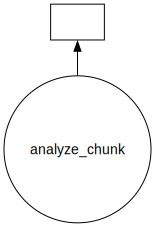

In [3]:
dask.visualize(*delayed_results, optimize_graph=True, filename='my_graph.svg')

In [26]:
import os
import numpy as np
from scipy.special import erfc

def probabilityfrom(Z: np.ndarray, dis: np.ndarray) -> np.ndarray:
    """
    Calculate probability based on the values of Z and dis.
    
    Parameters:
        Z (np.ndarray): A parameter of the function.
        dis (np.ndarray): Another parameter of the function.
        
    Returns:
        np.ndarray: The calculated probability.
    """
    e = np.e
    
    # Calculate pval based on the value of Z
    pval = erfc(Z)
    # Compute B_value using the calculated pval
    B_value = np.where(pval < e**(-1), -e*pval*np.log(np.abs(pval)), 1)
    
    # Compute prior and prob values
    prior = np.exp(-dis/2000)
    prob = 1 - (1 + ((B_value) * (1-prior) / (prior))**(-1))**(-1)

    return prob

# Parameters
surrogates = 30
years = 79
distance_matrix = np.load('X:/distance_matrix_corrected_CMIP6.npy')

# Carica gli array numpy e aggiungili alla lista
inpath = "X:/cross correlation max 2022 2100 low emission"
outpath = "X:/Fuzzy Networks IAAFT CMIP6 low emission" 
if not os.path.exists(outpath):
    os.makedirs(outpath)

outpath2 = "X:/Zscores IAAFT CMIP6 low emission" 
if not os.path.exists(outpath2):
    os.makedirs(outpath2)
    
for yr in range(1):
    arrays = []
    for i in range(0, surrogates+1):
        filename = f'{inpath}/corrs_{i}_year_{yr}.npy'
        # Controlla se il file esiste
        if not os.path.exists(filename):
            print(f'File non trovato: {filename}, continua con il prossimo.')
            continue
        loaded_array = np.load(filename)
        arrays.append(loaded_array)
    # Unisci gli array lungo un nuovo asse
    result_array = np.stack(arrays, axis=0)
    
    # Calcola la media e la deviazione standard delle altre correlazioni (1 fino a 10) per ogni periodo e nodoA
    medie = result_array[1:, :, :].mean(axis=0)
    deviazioni_standard = result_array[1:, :, :].std(axis=0)

    # Calcola lo z-score per tutte le correlazioni utilizzando le medie e le deviazioni standard calcolate
    z_scores = abs(result_array[0, :, :] - medie) / deviazioni_standard

    #print(z_scores)
    #np.save(f'{outpath2}/zscores_npy_year{2022+yr}.npy', z_scores)
    prob_array = probabilityfrom(z_scores, distance_matrix)
    #print(prob_array)
    #np.save(f'{outpath}/prob_npy_year{2022+yr}.npy', prob_array)

    print('year: ', 2022+yr)

C:\Users\David\AppData\Local\Temp\ipykernel_35964\3476736429.py:62: RuntimeWarning: invalid value encountered in divide
  z_scores = abs(result_array[0, :, :] - medie) / deviazioni_standard
C:\Users\David\AppData\Local\Temp\ipykernel_35964\3476736429.py:21: RuntimeWarning: divide by zero encountered in log
  B_value = np.where(pval < e**(-1), -e*pval*np.log(np.abs(pval)), 1)
C:\Users\David\AppData\Local\Temp\ipykernel_35964\3476736429.py:21: RuntimeWarning: invalid value encountered in multiply
  B_value = np.where(pval < e**(-1), -e*pval*np.log(np.abs(pval)), 1)


year:  2022


C:\Users\David\AppData\Local\Temp\ipykernel_35964\3476736429.py:25: RuntimeWarning: divide by zero encountered in reciprocal
  prob = 1 - (1 + ((B_value) * (1-prior) / (prior))**(-1))**(-1)


In [41]:
z_scores

array([[        nan, 15.07741378, 20.5475028 , ...,  1.62311442,
         1.64557845,  2.27494462],
       [        nan,         nan, 16.98387718, ...,  2.00433622,
         2.39399661,  2.08789037],
       [        nan,         nan,         nan, ...,  2.04862894,
         2.00802005,  2.06422562],
       ...,
       [        nan,         nan,         nan, ...,         nan,
         4.44018681,  4.4547518 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,  4.05770555],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [46]:
prob_array[1178][2439]

0.0016780022857925125

In [47]:
prob_array2 = np.load(f'{outpath}/prob_npy_year{2022}.npy')
prob_array2[1178][2439]

0.0016780022857925125

In [51]:
distance_matrix = np.load('X:/distance_matrix_grid5.npy')
distance_matrix2 = np.load('X:/distance_matrix_corrected_CMIP6.npy')

array1 = np.nan_to_num(prob_array)
array2 = np.nan_to_num(prob_array2)

# Trasformazione degli array in matrici triangolari superiori (diagonale esclusa)
triangular1 = np.triu(array1, k=1)
triangular2 = np.triu(array2, k=1)

# Conversione delle matrici triangolari in vettori per calcolare la distanza euclidea
vector1 = triangular1[triangular1 != 0]
vector2 = triangular2[triangular2 != 0]

# Calcolo della distanza euclidea
distance = np.linalg.norm(vector1 - vector2)

print("Distanza Euclidea:", distance)

Distanza Euclidea: 7.433115516145318


In [8]:
from scipy.special import erfc
import os
import dask.array as da

def probabilityfrom(Z: float, dis: float) -> float:
    """
    Calculate probability based on the values of Z and dis.
    
    Parameters:
        Z (float): A parameter of the function.
        dis (float): Another parameter of the function.
        
    Returns:
        float: The calculated probability.
    """
    e = np.e
    
    # Calculate pval based on the value of Z
    #pval = np.where(Z < 1, 1, 1/(Z**2))
    pval = erfc(Z)
    # Compute B_value using the calculated pval
    B_value = np.where(pval < e**(-1), -e*pval*np.log(np.abs(pval)), 1)
    
    # Compute prior and prob values
    prior = np.exp(-dis/2000)
    prob = 1 - (1 + ((B_value) * (1-prior) / (prior))**(-1))**(-1)

    return prob


distance_matrix = np.load('distance_matrix_corrected_CMIP6.npy')


for dec in range(79):
#for dec in range(1):
    print(f'analyzing yr {dec}')
    z_scores_numpy = np.load(f'./Zscore 2022 2100/zscores_year_{dec}.npy')
    prob_array = np.empty_like(z_scores_numpy)

    prob_array = probabilityfrom(z_scores_numpy, distance_matrix)

    np.save(f'./Networks 2022 2100/fuzzy_year{2022+dec}.npy', prob_array)

analyzing yr 0


C:\Users\David\AppData\Local\Temp\ipykernel_3596\2907766485.py:26: RuntimeWarning: divide by zero encountered in reciprocal
  prob = 1 - (1 + ((B_value) * (1-prior) / (prior))**(-1))**(-1)


analyzing yr 1
analyzing yr 2
analyzing yr 3
analyzing yr 4
analyzing yr 5
analyzing yr 6
analyzing yr 7
analyzing yr 8
analyzing yr 9
analyzing yr 10
analyzing yr 11
analyzing yr 12
analyzing yr 13
analyzing yr 14
analyzing yr 15
analyzing yr 16
analyzing yr 17
analyzing yr 18
analyzing yr 19
analyzing yr 20
analyzing yr 21
analyzing yr 22
analyzing yr 23
analyzing yr 24
analyzing yr 25
analyzing yr 26
analyzing yr 27
analyzing yr 28
analyzing yr 29
analyzing yr 30
analyzing yr 31
analyzing yr 32
analyzing yr 33
analyzing yr 34
analyzing yr 35
analyzing yr 36
analyzing yr 37
analyzing yr 38
analyzing yr 39
analyzing yr 40
analyzing yr 41
analyzing yr 42
analyzing yr 43
analyzing yr 44
analyzing yr 45
analyzing yr 46
analyzing yr 47
analyzing yr 48
analyzing yr 49
analyzing yr 50
analyzing yr 51
analyzing yr 52
analyzing yr 53
analyzing yr 54
analyzing yr 55
analyzing yr 56
analyzing yr 57
analyzing yr 58
analyzing yr 59
analyzing yr 60
analyzing yr 61
analyzing yr 62
analyzing yr 63
a